### 使用 VQLS 算法求解

In [1]:
# 导入必要的库
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as qml_np
import time
import numpy as np
import multiprocessing as mp
import multiprocessing_until

In [2]:
mp.cpu_count()

192

In [3]:
# 参数设置
steps = 30  # 迭代次数
eta = 0.8  # 学习率
seed = 1024 # 种子数
tol = 1e-4 # 终止条件
deep_layer = 3 # 电路层数
qubits = 3

qml_np.random.seed(seed)

# suijicanshu 
w = qml_np.random.uniform(low=0, high=2*np.pi, size=(deep_layer * qubits,))
print(w)


[4.06956402 6.26379276 3.25973705 4.13504424 3.7640268  4.73166161
 0.85606595 0.02586861 0.939392  ]


In [4]:
# 创建自定义优化器
opt = multiprocessing_until.CustomOptimizer(eta)

cost_history = []
w_history = []
for it in range(steps):
    print("step  = ", it)
    
    start = time.time()
    
    w, cost = opt.step_and_cost(multiprocessing_until.cost_loc, w)
    w_history.append(w)
    cost_history.append(cost)
    
    end = time.time()
    
    print("Cost_L = {:9.7f}".format(cost))
    print("time = ", end - start)

    if cost < tol:
        break    

step  =  0


/root/miniconda3/envs/pennylane_gpu/lib/python3.9/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0.23369106062032752
Cost_L = 0.1057841
time =  143.40147185325623
step  =  1
0.10578409186396742
Cost_L = 0.0323417
time =  140.32336711883545
step  =  2
0.032341744567352615
Cost_L = 0.0080868
time =  134.611563205719
step  =  3
0.008086788860123373
Cost_L = 0.0051265
time =  139.07733154296875
step  =  4
0.005126543330929212
Cost_L = 0.0050141
time =  134.61700105667114
step  =  5
0.005014107986077876
Cost_L = 0.0050156
time =  137.01700592041016
step  =  6
0.005015567788772768
Cost_L = 0.0048247
time =  141.26332354545593
step  =  7
0.004824685039372556
Cost_L = 0.0044846
time =  134.60225081443787
step  =  8
0.004484606370021016
Cost_L = 0.0040798
time =  139.90402221679688
step  =  9
0.004079791602672578
Cost_L = 0.0036791
time =  136.69877219200134
step  =  10
0.0036791064860581812
Cost_L = 0.0033279
time =  139.8993043899536
step  =  11
0.0033278633036751826
Cost_L = 0.0030489
time =  138.6230731010437
step  =  12
0.003048870028815931
Cost_L = 0.0028453
time =  133.6978237628936

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


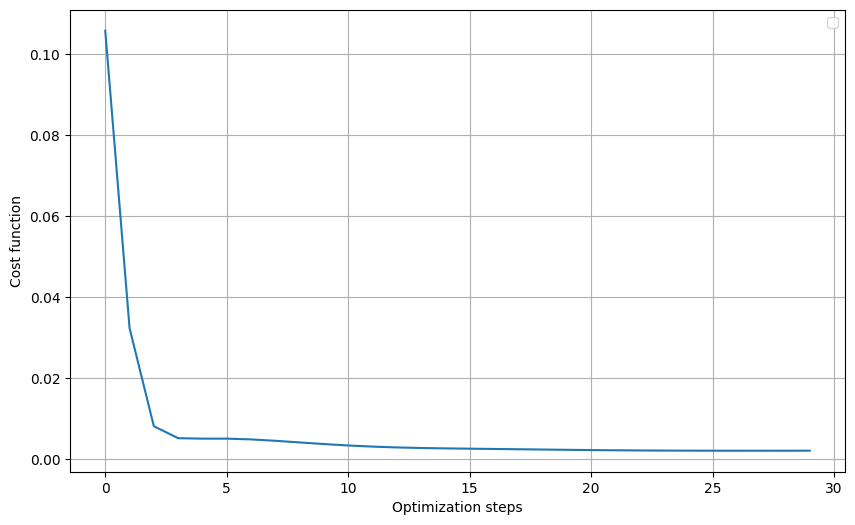

In [5]:
# 创建图形和轴
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(range(len(cost_history)), cost_history)

# 添加标题和标签
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.grid()
plt.legend()

# 显示图形
plt.show()

In [6]:
x_normalized = multiprocessing_until.x_normalized
H_matrix_2 = multiprocessing_until.H_matrix_2
b_norm = multiprocessing_until.b_norm

# 表示经典情况下，量子态在每个基向量上的概率
c_probs = (x_normalized) ** 2

# 返回测量值(shots = 2048)，或者是返回量子态形式
shots = 2048
x_sample = multiprocessing_until.sample_and_state(w, method='sample')
x_state = multiprocessing_until.sample_and_state(w, method='state')

# 将各种测量结果汇总，获得相关概率
samples = []
for sam in x_sample:
    samples.append(int("".join(str(bs) for bs in sam), base=2))

q_probs = np.bincount(samples) / shots


value = np.sqrt((H_matrix_2 @ x_state.real.reshape(-1,1)).conj().T @ (H_matrix_2 @ x_state.real.reshape(-1,1)))
x_state_value = b_norm * x_state/value

print("c_probs = ", c_probs)
print("q_probs = ", q_probs)
print("x_normalized = ", x_normalized)
print("x_state = ", x_state)
print("x_state_value= ", x_state_value)


c_probs =  [0.         0.         0.         0.80898876 0.14044944 0.0505618
 0.         0.        ]
q_probs =  [0.00341797 0.00732422 0.0078125  0.33837891 0.04882812 0.56640625
 0.01171875 0.01611328]
x_normalized =  [0.         0.         0.         0.89943803 0.37476584 0.22485951
 0.         0.        ]
x_state =  [ 0.06342419+0.j  0.09005711+0.j  0.08825919+0.j  0.57769205+0.j
  0.22796859+0.j -0.75215802+0.j -0.12070895+0.j  0.11860557+0.j]
x_state_value=  [[  5.18231708+0.j   7.35846203+0.j   7.21155662+0.j  47.20255012+0.j
   18.62705005+0.j -61.45796275+0.j  -9.86298859+0.j   9.69112388+0.j]]


/root/miniconda3/envs/pennylane_gpu/lib/python3.9/site-packages/pennylane/_qubit_device.py:666: UserWarning: Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.
  warnings.warn(


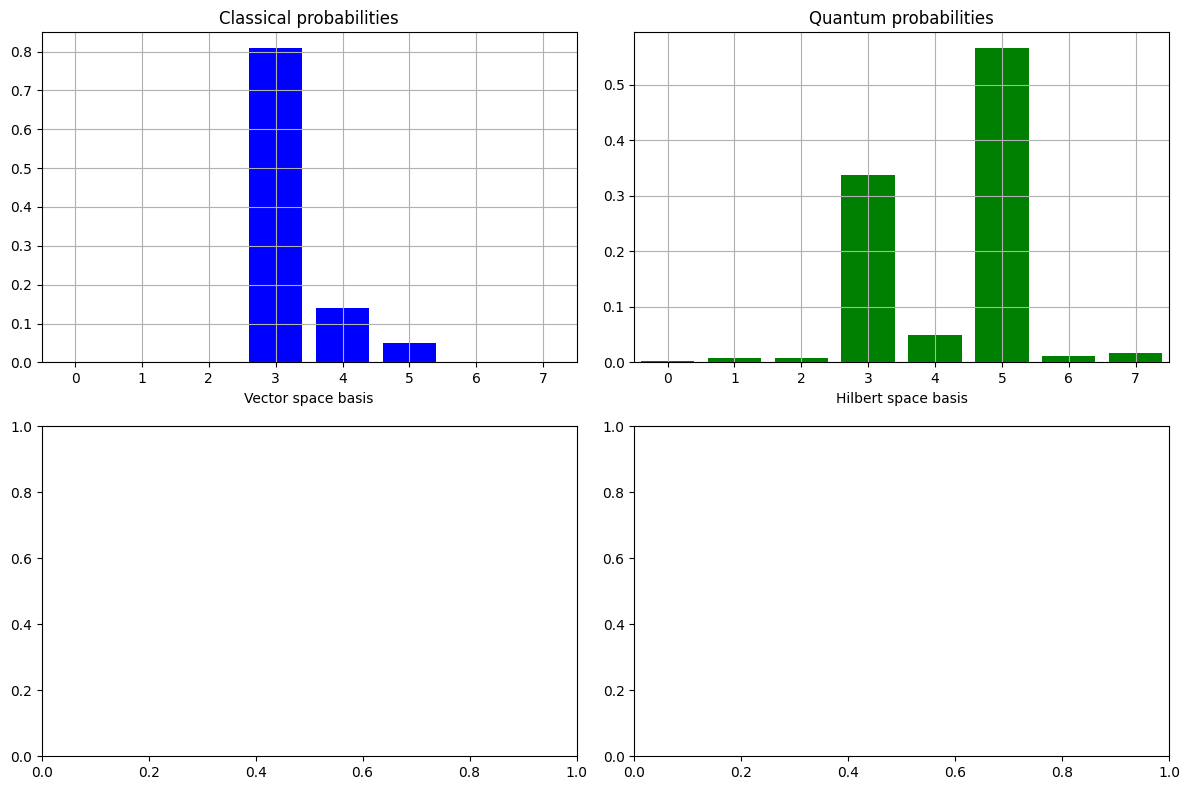

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(np.arange(0, 2 ** qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")
ax1.grid(True)  

ax2.bar(np.arange(0, 2 ** qubits), q_probs, color="green")
ax2.set_xlim(-0.5, 2 ** qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")
ax2.grid(True)

# 调整布局以防止子图重叠
plt.tight_layout()
plt.show()

In [11]:
print("cost_history = ", cost_history)
# print("w_history = ", w_history)

cost_history =  [0.10578409186396742, 0.032341744567352615, 0.008086788860123373, 0.005126543330929212, 0.005014107986077876, 0.005015567788772768, 0.004824685039372556, 0.004484606370021016, 0.004079791602672578, 0.0036791064860581812, 0.0033278633036751826, 0.003048870028815931, 0.0028453164891465987, 0.00270535929091259, 0.0026087115824814378, 0.002534168567920103, 0.002465825387066911, 0.002395962209111202, 0.0023242037327059206, 0.002254385362137401, 0.0021912232466984594, 0.0021381855511810044, 0.0020967996199351413, 0.0020669023937027187, 0.0020472383364870117, 0.0020360293891863446, 0.002031378611779766, 0.002031505449243909, 0.0020348577524452738, 0.002040147618944832]


In [12]:
w

tensor([4.47641446, 5.63449017, 4.48172876, 3.65588352, 2.92052642,
        4.36835527, 1.20978976, 0.48213525, 0.31008941], requires_grad=True)